# Simple Example for Section 4 Bounds

This is a simple example of computing the bounds in section 4 (theorems 4.8 and 4.9) with $\dim(\mathcal{O}) = 2$ with features ["pill taken?", "headache relief?"] and three selected possible causes: ["aspirin","caffeine", "placebo"]. We derive bounds for all three possible causes.

To help with intuition, this example uses normalized posterior probabilities (i.e., $\Pr(\mathbf{x})$ in the denominator), but produces the same results as the ranking is the same.

### Define Setup



In [564]:
from typing import List
import numpy as np
import numpy as np
from scipy.stats import uniform # this can easily be switched for another distribution
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


def show_heatmap(data, title):
    # Create the heat map
    sns.heatmap(data, annot=True, cmap='viridis')
    # Display the plot
    plt.title(title)
    plt.show()
    return


class Posterior:
    def __init__(self,lower:float, upper:float, color:str, name:str, distribution_type="uniform") -> None:
        self.lower = lower
        self.upper = upper
        self.color = color
        self.name = name
        self.distribution_type = distribution_type
        self.rv = self.make_rv()  # random variable representation
        return
    def get_bounds(self):
        return [self.lower, self.upper]
    
    def make_rv(self): 
        if self.distribution_type == "uniform":
            return uniform(loc=self.lower, scale=self.upper-self.lower)#1/(self.upper - self.lower)
        else:
            return ValueError("No other methods supported")
    def get_pdf(self, x):
        return self.rv.pdf(x)
        
class Cause:
    def __init__(self, name:str, likelihood_dist_l:List[List[float]], likelihood_dist_u:List[List[float]], 
                 prior_l:float, prior_u:float, evidence_dist:List[List[float]]) -> None:
        self.name = name
        self.likelihood_dist_l = likelihood_dist_l
        self.likelihood_dist_u = likelihood_dist_u
        self.prior_l = prior_l
        self.prior_u = prior_u
        self.evidence_dist = evidence_dist
        self.posteriors = self.populate_posteriors() # array of posterior objects for every observation vect
        
        return 
    def populate_posteriors(self):
        posteriors = [[None,None],[None,None]]
        for i in [0,1]:
            for j in [0,1]:
                lower_posterior = self.likelihood_dist_l[i][j]*self.prior_l/self.evidence_dist[i][j]
                upper_posterior = self.likelihood_dist_u[i][j]*self.prior_u/self.evidence_dist[i][j]
                posteriors[i][j] = Posterior(lower=lower_posterior,
                                                  upper=upper_posterior,
                                                  color="blue",
                                                  name=f"{self.name}")
        return  posteriors
    def display_posteriors(self):
        # print(f"Lower posteriors of cause {self.name}:")
        show_heatmap([[self.posteriors[0][0].lower, self.posteriors[0][1].lower], 
              [self.posteriors[1][0].lower, self.posteriors[1][1].lower]], 
              f"Lower Posterior Distribution of '{self.name}'")
        
        show_heatmap([[self.posteriors[0][0].upper, self.posteriors[0][1].upper], 
              [self.posteriors[1][0].upper, self.posteriors[1][1].upper]], 
              f"Upper Posterior Distribution of '{self.name}'")
  
        return
    





Create evidence distribution. Indices of the evidence distribution are as follows

- (0,0)=(no pill taken, no headache relieved)
- (0,1)=(no pill taken, headache relieved)

- (1,0)=(pill taken,  no headache relieved) 
- (1,1)=(pill taken, headache relieved)

This is the only fixed probability assumed.

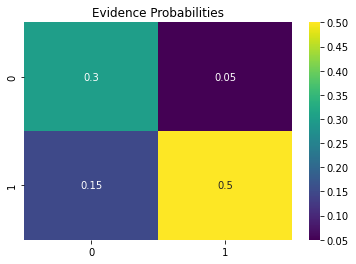

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt


def show_heatmap(data, title):
    # Create the heat map
    sns.heatmap(data, annot=True, cmap='viridis')
    # Display the plot
    plt.title(title)
    plt.show()
    return

EVIDENCE_DIST = [[0.3, 0.05],
                 [0.15, 0.5]]
show_heatmap(EVIDENCE_DIST, "Evidence Probabilities")
Q_CONFIDENCE = 0.95

Declare likelihood and prior ranges for each each cause: Aspirin, Placebo Pill, Caffeine.

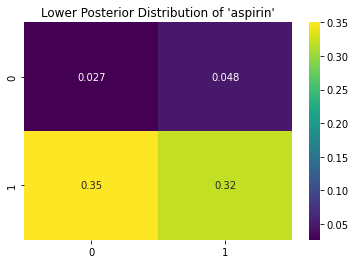

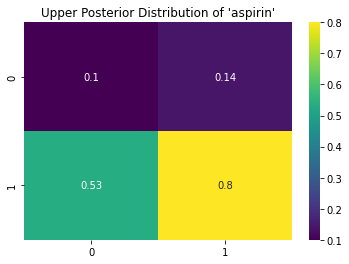

In [566]:
# aspirin
aspirin_likelihood_u = np.array([[0.03,0.007],
                                  [0.08,0.4]])/0.517
aspirin_likelihood_l = [[0.02,0.006],
                        [0.13125,0.4]]
aspirin_prior_l = 0.4
aspirin_prior_u = 0.517

aspirin = Cause(name="aspirin",
                likelihood_dist_l=aspirin_likelihood_l, 
                likelihood_dist_u=aspirin_likelihood_u,
                prior_l=aspirin_prior_l,
                prior_u=aspirin_prior_u,
                evidence_dist=EVIDENCE_DIST)


aspirin.display_posteriors()


# show_heatmap(aspirin_likelihood_l, "Aspirin Likelihood Distribution (Lower)")
# show_heatmap(aspirin_likelihood_u, "Aspirin Likelihood Distribution (Upper)")

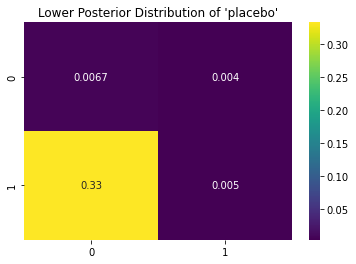

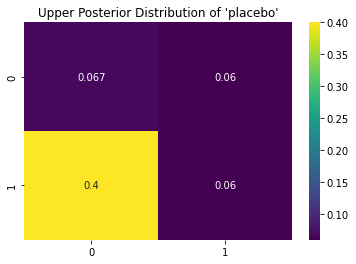

In [567]:
# placebo
# (0,0)=(no pill taken, no headache relieved) | (0,1)=(no pill taken, headache relieved)
# (1,0)=(pill taken,  no headache relieved)   | (1,1)=(pill taken, headache relieved)

placebo_likelihood_u = np.array([[0.02,0.003],
                        [0.06,0.03]])/0.113
placebo_likelihood_l = [[0.02,0.002],
                        [0.5,0.025]]
placebo_prior_l = 0.1
placebo_prior_u = 0.113

placebo = Cause(name="placebo",
                likelihood_dist_l=placebo_likelihood_l, 
                likelihood_dist_u=placebo_likelihood_u,
                prior_l=placebo_prior_l,
                prior_u=placebo_prior_u,
                evidence_dist=EVIDENCE_DIST)


placebo.display_posteriors()
# show_heatmap(placebo_likelihood_l, "Placebo Likelihood Distribution (Lower)")
# show_heatmap(placebo_likelihood_u, "Placebo Likelihood Distribution (Upper)")

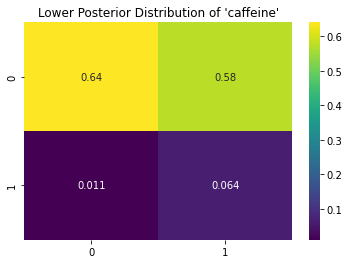

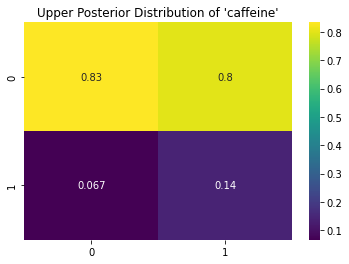

In [568]:
# caffeine
# (0,0)=(no pill taken, no headache relieved) | (0,1)=(no pill taken, headache relieved)
# (1,0)=(pill taken,  no headache relieved)   | (1,1)=(pill taken, headache relieved)

caffeine_likelihood_u = np.array([[0.25,0.04],        # began with posteriors for toy example
                                  [0.01,0.07]])/0.37

caffeine_likelihood_l = [[0.6,0.09],
                        [0.005,0.1]]
caffeine_prior_l = 0.32
caffeine_prior_u = 0.37

caffeine = Cause(name="caffeine",
                likelihood_dist_l=caffeine_likelihood_l, 
                likelihood_dist_u=caffeine_likelihood_u,
                prior_l=caffeine_prior_l,
                prior_u=caffeine_prior_u,
                evidence_dist=EVIDENCE_DIST)


caffeine.display_posteriors()

# show_heatmap(caffeine_likelihood_l, "Caffeine Likelihood Distribution (Lower)")
# show_heatmap(caffeine_likelihood_u, "Caffeine Likelihood Distribution (Upper)")

Verify that sum of upper bounds of posteriors are less than or equal to 1. 

In [569]:
for i in [0,1]:
    for j in [0,1]:
        print(caffeine.posteriors[i][j].upper+placebo.posteriors[i][j].upper+aspirin.posteriors[i][j].upper)


1.0
0.9999999999999999
1.0
1.0


Define posteriors for given observation vector.

In [570]:
# define observation vector
pill = 1 # pill is present
relief = 0 # headache not relieved


aspirin_post = aspirin.posteriors[pill][relief]
placebo_post = placebo.posteriors[pill][relief]
caffeine_post = caffeine.posteriors[pill][relief]

aspirin_post.color = "red"
caffeine_post.color = "orange"

posteriors = [aspirin_post,
              placebo_post,
              caffeine_post]

Plot the 95% confidence posterior ranges.

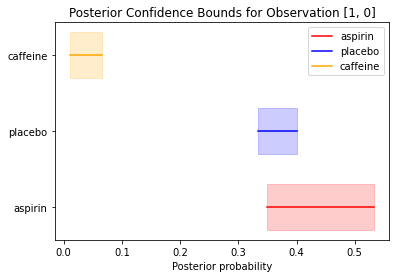

In [571]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()
bar_width = 0.3

# Plot the first horizontal line (stick) with confidence interval

count = 1 # determines y-position on graph

upper_bounds = []
lower_bounds = []
for posterior in posteriors:
    upper_bounds.append(posterior.upper)
    lower_bounds.append(posterior.lower)

    ax.plot([posterior.lower, posterior.upper], 
            [count, count], label=posterior.name, color=posterior.color)
    ax.fill_betweenx([count - bar_width, count + bar_width], posterior.lower, posterior.upper,
                      color=posterior.color, alpha=0.2)

    count += 1 # increment height

# Add labels and title
ax.set_xlabel('Posterior probability')
ax.set_yticks([1, 2, 3])
ax.set_yticklabels([posterior.name for posterior in posteriors])
ax.set_title(f"Posterior Confidence Bounds for Observation {[pill, relief]}")

# Add a legend
ax.legend()

Get highest upper bound and lower bound

In [572]:
u = max(upper_bounds)
l = max(lower_bounds)
print(f"u: {u}\nl: {l}")

# print(aspirin_post.get_pdf(0.6))

# 1/(0.53-0.17)

u: 0.5333333333333333
l: 0.35000000000000003


### Brute Force way of Finding IsMax 
This method is more expensive, but does not require that C_other is guaranteed not to be the maximum posterior. 

Note that in this experiment we use normalized posteriors for intuition $M_i = \frac{\Pr(C_i|\mathbf{x})\Pr(C_i)}{\Pr(x)}$ for intution, and so the posteriors sum up to 1.

Theorem 4.2 makes no assumptions about the placement of the upper and lower posterior bounds. If the upper posteriors bounds do not exceed $1$, the posteriors of selected causes are independent, leaving any remaining probability to the (dependent) last cause, $C_{other}$. (One could use a similar method if the sum of upper posteriors exceeded 1, but formulating the probability density function would require additional steps. We went with the easier approach since this example is for intuition.)

Here's the reasoning:

<u> Independence of Posteriors </u>:


Suppose we have $k$ posteriors (this includes $M_{other}$, the combined posterior that anything not in our selected 'causes' was the cause). Treat each $M_i \in \mathcal{M}$ as a random variable.
Then, **if the sum of upper bounds of every posterior in $\mathcal{M}$ does not exceed 1 (or $\Pr(\mathbf{x})$)**, we can let the first $k-1$ causes be independent (because of this upper bound, selecting *any* random posteriors within this range and adding them up will *never* exceed $\Pr(\mathbf{x})$) while the last posterior, $M_{other}$, is a fully dependent random variable $M_{other} = 1-\sum_i{M_i}$ (or  $M_{other} = \Pr(\mathbf{x})-\sum_i{M_i}$). 

<u> Pr(IsMax(M_i)) is just expected value of an indicator function </u>:

For simplicity let $X$, $Y$, $Z$, ... be the chosen (independent) posterior random variables, and let $x$, $y$, and $z$ be the specific values they take on. Also, suppose we are finding the probability that $X$ is the maximum posterior. Then, let this be the indicator function that x is the maximum.
$$
\mathbf{1}_{\{{x}_{max}\}}(x,y,z) = \begin{cases} 
1 & \text{if } x = \max(\{x,y,z,1-(x+y+z)\}) \\ 
0 & \text{otherwise }
\end{cases}
$$

The expected value of this indicator function basically is the same value as (1) tallying up the total number of configurations of $x$, $y$, $z$, (and $(1-x-y-z)$) where $x$ is the maximum, and then (2) dividing it by the total number of configurations of $x$, $y$, and $z$. This is the same thing as the probability that $X=x$ is the maximum.

We can find this with LOTUS:

$$
\begin{align*}
\Pr(IsMax(X)) &= \int_{x_l}^{x_u} \int_{y_l}^{y_u} \int_{z_l}^{z_u} \mathbf{1}_{\{{x}_{max}\}}(x,y,z)f(x, y, z) \, dz \, dy \, dx\\
&= \int_{x_l}^{x_u} \int_{y_l}^{y_u} \int_{z_l}^{z_u} \mathbf{1}_{\{{x}_{max}\}}(x,y,z)f(x)f(y)f(z) \, dz \, dy \, dx\\
\end{align*}
$$


### Alternative way to find IsMax with optimized form
This method is less computationally expensive, but requires that $C_other$ is not the maximum posterior.
$$
\begin{align*}
\Pr(IsMax(M_i)) &= \int_{l}^{u} {P\left(M_i = x,\!\!\! \bigcap_{\substack{M_j \in \mathcal M',\\ C_j\neq C_i}}{\!\!\!(M_j<x)}\right)}dx\\
&= \int_{l}^{u} P(M_i = x) \prod_{j \neq i}^N[\mathbb{1}_{l_j \le x} \int_{l_i}^x f_{M_j}(y)dy]dx

\end{align*}
$$

Let's see what $C_{other}$ looks like, which is the random variable $C_{other} = 1 - \sum_{M_i \neq M_{other}} M_i$. We can estimate this with sampling or with convolution libraries in SciPy. Here we will use sampling.

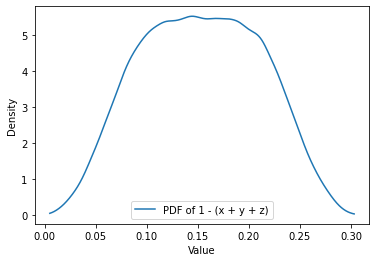

In [573]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve
from scipy.stats import norm, gaussian_kde


# Define the distributions for x, y, and z
rv_x = aspirin_post.rv#norm(loc=0, scale=1)  # Normal distribution with mean=0 and std=1
rv_y = caffeine_post.rv#norm(loc=1, scale=2)  # Normal distribution with mean=1 and std=2
rv_z = placebo_post.rv#norm(loc=-1, scale=0.5)  # Normal distribution with mean=-1 and std=0.5

# Generate samples
n_samples = 100000
samples_aspirin = aspirin_post.rv.rvs(size=n_samples)
samples_caffeine = caffeine_post.rv.rvs(size=n_samples)
samples_placebo = placebo_post.rv.rvs(size=n_samples)

# Compute the new random variable 1 - (x + y + z)
samples_new = 1 - (samples_aspirin + samples_caffeine + samples_placebo)

# Approximate the pdf using a kernel density estimate
pdf_other = gaussian_kde(samples_new)
x_grid = np.linspace(min(samples_new), max(samples_new), 1000)
display_pdf = pdf_other(x_grid)

# Plot the approximate pdf
plt.plot(x_grid, display_pdf, label='PDF of 1 - (x + y + z)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()



Create a posterior object with this distribution.

In [574]:
# Verify the upper and lower bounds of this pdf
other_lower = 1 - (aspirin_post.upper + placebo_post.upper + caffeine_post.upper)
other_upper = 1 - (aspirin_post.lower + placebo_post.lower + caffeine_post.lower)
print(other_lower, other_upper) 

M_other = Posterior(lower=0,upper=0.5,color="red", name="other")
M_other.pdf = pdf_other

0.0 0.30599999999999994


Since the upper bound of M_other is lower than the lower bounds of aspirin and the placebo, M_other can never be the maximum posterior, and we can use the following straightforward derivation of $\Pr(IsMax(M_i))$

Compute the integral
$$
\begin{align*}
\Pr(IsMax(M_i)) &= \int_{l}^{u} {P\left(M_i = x,\!\!\! \bigcap_{\substack{M_j \in \mathcal M',\\ C_j\neq C_i}}{\!\!\!(M_j<x)}\right)}dx\\
&= \int_{l}^{u} P(M_i = x) \prod_{j \neq i}^N[\mathbb{1}_{l_j \le x} \int_{l_j}^x f_{M_j}(y)dy]dx

\end{align*}
$$

In [575]:
import scipy.integrate as integrate

def prob_all_lower(x:float, other_posteriors:List[Posterior]) -> float:
    # get prob that all other posteriors are lower (product summation on right)
    prob_all_lower = 1
    for alt_posterior in other_posteriors:
        # find probability alt_posterior is lower than x

        if alt_posterior.lower < x or alt_posterior.lower == x:
            # if the lower bound is lower than x, it has a shot at being lower
            inner_inner_function = lambda y: alt_posterior.get_pdf(y) # integrate over y            
            prob_lower, _ = integrate.quad(inner_inner_function, alt_posterior.lower, x)
        else:
            # if the lower bound is not lower than x, it cannot be lower
            prob_lower = 0
            break # no point in calculating the rest

        prob_all_lower *= prob_lower
    return prob_all_lower


def integrand(x:float, chosen_posterior:Posterior, other_posteriors:List[Posterior]) -> float: # posterior is M_i
    # get prob that every other posterior is lower
    prob_lower = prob_all_lower(x,other_posteriors)
    
    # get pdf value of pdf for chosen_posterior (M_i)
    pdf_val_chosen = chosen_posterior.get_pdf(x)

    return pdf_val_chosen*prob_lower

def mc_integrate(func, a, b, n = 1000):
    # Monte Carlo integration between x1 and x2 of given function from a to b
    
    vals = np.random.uniform(a, b, n)
    y = [func(val) for val in vals]
    
    y_mean = np.sum(y)/n
    integ = (b-a) * y_mean
    
    return integ

def get_PrIsMax(chosen_posterior:Posterior, other_posteriors:List[Posterior], 
                l:float, u:float, method="not mc", n=1000) -> float:
    func = lambda x: integrand(x, chosen_posterior, other_posteriors)
    if method == "monte_carlo": # can add more integration methods here
        return mc_integrate(func, l, u, n)
    else:
        return integrate.quad(func, l, u) 




    

In [576]:
prob_all_lower(x=0.38,other_posteriors=[caffeine_post, placebo_post]) # tests

0.7000000025106646

In [577]:
# use u and l from earlier (maximum upper bound and maximum lower bound)
ismax_aspirin, standard_error_aspirin = get_PrIsMax(aspirin_post, [caffeine_post, placebo_post], l, u)
print("IsMax aspirin: ", ismax_aspirin)
print("Aspirin IsMax error: ", standard_error_aspirin)

IsMax aspirin:  0.8977174726614005
Aspirin IsMax error:  1.0120750987940852e-05


/var/folders/nf/894cqyvd0g116lz_vn_6x6ym0000gn/T/ipykernel_64792/3355032701.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(func, l, u)


In [578]:
ismax_placebo, standard_error_placebo = get_PrIsMax(placebo_post, [caffeine_post, aspirin_post], l, u)
print("IsMax placebo: ", ismax_placebo)
print("Placebo IsMax error: ", standard_error_placebo)

IsMax placebo:  0.10227272706487041
Placebo IsMax error:  7.802089668773604e-10


In [595]:
ismax_caffeine, standard_error_caffeine = get_PrIsMax(caffeine_post, [caffeine_post, aspirin_post], l, u)
print("IsMax placebo: ", ismax_caffeine)
print("caffeine IsMax error: ", standard_error_caffeine)

IsMax placebo:  0.0
caffeine IsMax error:  0.0


Verify that isMax probabilities sum to one (or something very close to 1).

In [594]:
print(ismax_aspirin+ismax_caffeine+ismax_placebo)

0.9999901997262709


### Calculating BER

This example is small enough to directly calculate lower and upper bounds of BER with the summation form of Definition 4.3 (Sekeh et. al.) without the use of estimation techniques. (For more complex problems with many causes $|\mathcal{O}| = 2^{|\mathcal{C}|}$ may be very large, so it may be more practical apply the estimation techniques while treating the observations as continuous).

$$\epsilon = 1 - \sum_{\mathbf{x} \in \mathcal{O}} \Pr(\textbf{x})\max_i \Pr(C_i|\textbf{x}).$$

In [596]:
def get_posteriors(i:int, j:int, cause_objs:List[Cause], upper:bool):
    # get list of poteriors for the [i,j] observation vector
    posteriors = []
    for cause in cause_objs:
        posterior_obj = cause.posteriors[i][j]
        if upper:
            posteriors.append(posterior_obj.upper)
        else:
            posteriors.append(posterior_obj.lower)
    return posteriors    


Upper bound of BER

In [598]:
ber_lower = 1 - sum([EVIDENCE_DIST[i][j]*max(get_posteriors(i,j, [aspirin, placebo, caffeine], 
                                                                upper=True)) 
                                                                for i in [0,1] for j in [0,1]])
print(f"BER upper bounds: {ber_upper}")

BER upper bounds: 0.5667


In [599]:
ber_upper = 1 - sum([EVIDENCE_DIST[i][j]*max(get_posteriors(i,j, [aspirin, placebo, caffeine], 
                                                                upper=False)) 
                                                                for i in [0,1] for j in [0,1]])
print(f"BER lower bounds: {ber_lower}")

BER lower bounds: 0.22999999999999998


### Calculate Abductive Error Guarantees
Now that we have $\epsilon_{lower}$, $\epsilon_{upper}$, and the IsMax values for all possible causes, we can follow section 4.3 to find the final general error rate bounds.

Calculate $\gamma_{i,upper}$ and $\gamma_{i,lower}$ for each cause, the error rate (when posterior $M_i$ is chosen) given the assumption that posteriors lie in their 95% confidence intervals.
$$
    \gamma_{i,upper} = \epsilon_{\text{upper}}\Pr(IsMax(M_i)) + (1-l_i)(1-\Pr(IsMax(M_i)))
$$

and

$$
\gamma_{i,lower} = \epsilon_{\text{lower}}\Pr(IsMax (M_i)) + (1-u_i)(1-\Pr(IsMax(M_i)))
$$

Set the preferred observation vector.

In [600]:
pill = 1 # did you take a pill?
relief = 0 # was your headache relieved?

In [601]:
# maps cause object to probability of wrong abduction and posterior is maximum
gamma_upper = {
    "aspirin"  : ber_upper*ismax_aspirin + 
                (1-aspirin.posteriors[pill][relief].lower)*(1-ismax_aspirin),
    "caffeine" : ber_upper*ismax_caffeine + 
                (1-caffeine.posteriors[pill][relief].lower)*(1-ismax_caffeine),
    "placebo"  : ber_upper*ismax_placebo + 
                (1-placebo.posteriors[pill][relief].lower)*(1-ismax_placebo),
    } 

gamma_lower = {
    "aspirin"  : ber_lower*ismax_aspirin + 
                (1-aspirin.posteriors[pill][relief].upper)*(1-ismax_aspirin),
    "caffeine" : ber_lower*ismax_caffeine + 
                (1-caffeine.posteriors[pill][relief].upper)*(1-ismax_caffeine),
    "placebo"  : ber_lower*ismax_placebo + 
                (1-placebo.posteriors[pill][relief].upper)*(1-ismax_placebo),
    } 


print(gamma_upper)
print(gamma_lower)

{'aspirin': 0.5752201345273052, 'caffeine': 0.9893333333333333, 'placebo': 0.6564428030510817}
{'aspirin': 0.25420686480346855, 'caffeine': 0.9333333333333333, 'placebo': 0.5621590909859979}


Referring to the diagram of posterior bounds, causes "aspirin" and "placebo" have error rates around 50% because they are tied winners with close midpoints, and so either cause may be the true maximum posterior. Caffeine has an extremely high error rate because if it is contained inside its 95% bounds, it has no chance of being the maximum posterior.

Compute the final bounds.

$$\Pr(W)\leq 1-q^k(1-\gamma_{\text{i, upper}})$$

$$\Pr(W)\geq \gamma_{\text{i, lower}} q^k$$

In [624]:

k = 3 # there are 3 selected causes
general_upper = {key : 1-(Q_CONFIDENCE**k)*(1-gamma_bound) for key, gamma_bound in gamma_upper.items()}

general_lower = {key : gamma_bound*Q_CONFIDENCE**k for key, gamma_bound in gamma_lower.items()}


print(f"General error upper bounds of: {[pill, relief]}\n", general_upper)
print(f"General error lower bounds: {[pill, relief]}\n", general_lower)


General error upper bounds of: [1, 0]
 {'aspirin': 0.6358043628403484, 'caffeine': 0.9908546666666667, 'placebo': 0.7054426482659213}
General error lower bounds: [1, 0]
 {'aspirin': 0.21795061071087382, 'caffeine': 0.8002166666666666, 'placebo': 0.4819811506341199}


We can do the same for all other observation vectors

In [659]:
def get_general_bounds(pill, relief):
    gamma_upper = {
        "aspirin"  : ber_upper*ismax_aspirin + 
                    (1-aspirin.posteriors[pill][relief].lower)*(1-ismax_aspirin),
        "caffeine" : ber_upper*ismax_caffeine + 
                    (1-caffeine.posteriors[pill][relief].lower)*(1-ismax_caffeine),
        "placebo"  : ber_upper*ismax_placebo + 
                    (1-placebo.posteriors[pill][relief].lower)*(1-ismax_placebo),
        } 

    gamma_lower = {
        "aspirin"  : ber_lower*ismax_aspirin + 
                    (1-aspirin.posteriors[pill][relief].upper)*(1-ismax_aspirin),
        "caffeine" : ber_lower*ismax_caffeine + 
                    (1-caffeine.posteriors[pill][relief].upper)*(1-ismax_caffeine),
        "placebo"  : ber_lower*ismax_placebo + 
                    (1-placebo.posteriors[pill][relief].upper)*(1-ismax_placebo),
        } 


    k = 3 # there are 3 selected causes
    general_upper = {key : 1-(Q_CONFIDENCE**k)*(1-gamma_bound) for key, gamma_bound in gamma_upper.items()}

    general_lower = {key : gamma_bound*Q_CONFIDENCE**k for key, gamma_bound in gamma_lower.items()}

    for post in ["caffeine", "placebo", "aspirin"]:
        lower = "{:2f}".format(general_lower[post])
        upper = "{:2f}".format(general_upper[post])
        print(f"Selecting posterior `{post}` has error rate bounds: ({lower}, {upper})")
    # print(f"General error upper bounds of {[pill, relief]}")
    # for post, prob in general_upper.items():
    #     print(f"Selecting posterior `{post}` has ")
    # print(f"General error lower bounds {[pill, relief]}\n", general_lower)
    # return # general_upper, general_lower

In [660]:
get_general_bounds(0,0)

Selecting posterior `caffeine` has error rate bounds: (0.142896, 0.451280)
Selecting posterior `placebo` has error rate bounds: (0.738544, 0.956874)
Selecting posterior `aspirin` has error rate bounds: (0.255952, 0.664159)


In [661]:
get_general_bounds(0,1)

Selecting posterior `caffeine` has error rate bounds: (0.171475, 0.506152)
Selecting posterior `placebo` has error rate bounds: (0.743675, 0.958927)
Selecting posterior `aspirin` has error rate bounds: (0.252444, 0.662288)


In [662]:
get_general_bounds(1,1)

Selecting posterior `caffeine` has error rate bounds: (0.737342, 0.945128)
Selecting posterior `placebo` has error rate bounds: (0.743675, 0.958157)
Selecting posterior `aspirin` has error rate bounds: (0.194565, 0.638435)


### Extra
Graphing function for posterior ranges of any observation

In [663]:
def get_CIs(pill, relief):
    aspirin_post = aspirin.posteriors[pill][relief]
    placebo_post = placebo.posteriors[pill][relief]
    caffeine_post = caffeine.posteriors[pill][relief]

    aspirin_post.color = "red"
    caffeine_post.color = "orange"
    
    posteriors = [aspirin_post,
                placebo_post,
                caffeine_post]

        # Create a figure and axis
    fig, ax = plt.subplots()
    bar_width = 0.3

    # Plot the first horizontal line (stick) with confidence interval

    count = 1 # determines y-position on graph

    upper_bounds = []
    lower_bounds = []
    for posterior in posteriors:
        upper_bounds.append(posterior.upper)
        lower_bounds.append(posterior.lower)

        ax.plot([posterior.lower, posterior.upper], 
                [count, count], label=posterior.name, color=posterior.color)
        ax.fill_betweenx([count - bar_width, count + bar_width], posterior.lower, posterior.upper,
                        color=posterior.color, alpha=0.2)

        count += 1 # increment height

    # Add labels and title
    ax.set_xlabel('Posterior probability')
    ax.set_yticks([1, 2, 3])
    ax.set_yticklabels([posterior.name for posterior in posteriors])
    ax.set_title(f"Posterior Confidence Bounds for Observation {[pill, relief]}")

    # Add a legend
    ax.legend()

See all posterior ranges and results

Selecting posterior `caffeine` has error rate bounds: (0.142896, 0.451280)
Selecting posterior `placebo` has error rate bounds: (0.738544, 0.956874)
Selecting posterior `aspirin` has error rate bounds: (0.255952, 0.664159)


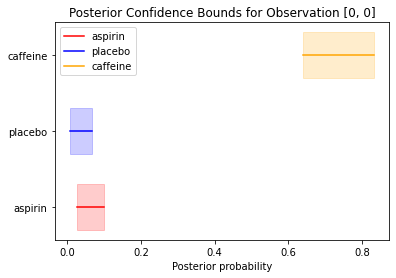

In [664]:
get_CIs(0,0)
get_general_bounds(0,0)

Selecting posterior `caffeine` has error rate bounds: (0.171475, 0.506152)
Selecting posterior `placebo` has error rate bounds: (0.743675, 0.958927)
Selecting posterior `aspirin` has error rate bounds: (0.252444, 0.662288)


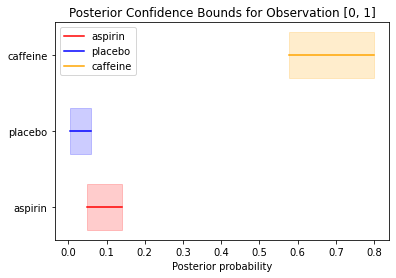

In [665]:
get_CIs(0,1)
get_general_bounds(0,1)

Selecting posterior `caffeine` has error rate bounds: (0.800217, 0.990855)
Selecting posterior `placebo` has error rate bounds: (0.481981, 0.705443)
Selecting posterior `aspirin` has error rate bounds: (0.217951, 0.635804)


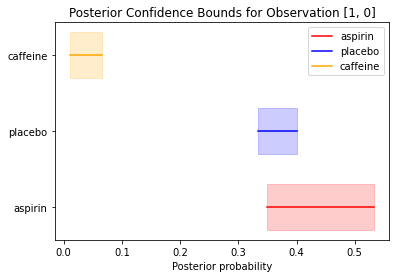

In [666]:
get_CIs(1,0)
get_general_bounds(1,0)

Selecting posterior `caffeine` has error rate bounds: (0.737342, 0.945128)
Selecting posterior `placebo` has error rate bounds: (0.743675, 0.958157)
Selecting posterior `aspirin` has error rate bounds: (0.194565, 0.638435)


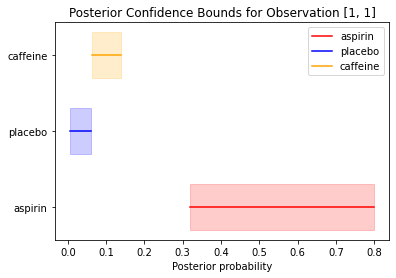

In [667]:
get_CIs(1,1)
get_general_bounds(1,1)